# 🛒 Ecommerce Text Classification using LLM Embeddings

This notebook performs product text classification using embeddings generated from a SentenceTransformer model. It classifies ecommerce product descriptions into one of the four categories:

- 📚 **Books**  
- 👕 **Clothing & Accessories**  
- 🏠 **Household**  
- 📱 **Electronics**

### Workflow Summary
- Sentence embeddings are generated using a **task-specific model** from [SentenceTransformers](https://www.sbert.net/).
- Labels are encoded using **LabelEncoder**.
- A **machine learning classifier** is trained on the encoded embeddings to predict the product category.
- Model evaluation is performed using accuracy, precision, recall, F1 score, and a confusion matrix.

## 📘 Notebook and Dataset

<table>
  <tr>
    <td><strong>📔 View the Notebook</strong></td>
    <td>
      <a href="https://www.kaggle.com/code/arooshahmadds/ecommerce-text-classification" target="_blank">
        <img src="https://img.shields.io/badge/Open%20Notebook-Kaggle-blue?logo=kaggle" alt="Notebook Link">
      </a>
    </td>
  </tr>
  <tr>
    <td><strong>📦 Dataset Used</strong></td>
    <td>
      <a href="https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification" target="_blank">
        <img src="https://img.shields.io/badge/View%20Dataset-Kaggle-blue?logo=kaggle" alt="Dataset Link">
      </a>
    </td>
  </tr>
</table>



> ✨ Tip: You can modify the classifier head to experiment with models like Logistic Regression, SVM, RandomForest, or even fine-tuned transformer heads.


In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv


# Load Dataset

In [2]:
data_path ="/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv"

In [62]:
dataset = pd.read_csv(data_path, names=["label", "text"])

In [63]:
dataset.head()

,label,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [54]:
texts = dataset.iloc[:,1]
labels = dataset.iloc[:,0]

In [6]:
labels.shape

(50424,)

In [7]:
len(labels), len(texts)

(50424, 50424)

In [8]:
labels[0], texts[0]

('Household',
 "SAF 'Floral' Framed Painting (Wood, 30 inch x 10 inch, Special Effect UV Print Textured, SAO297) Painting made up in synthetic frame with UV textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch (A perfect gift for your special ones).")

In [9]:
labels.unique()

array(['Household', 'Books', 'Clothing & Accessories', 'Electronics'],
      dtype=object)

# Encoding Features and Labels
- labels: use Label encoder for these
- text: using `SentenceTransformers` from Hugging Face
  - As doing classification with pre-trained **task-specific embedding models** with an ML classifier head


In [10]:
# encoding labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit the encoder to the data and transform it
encoded_labels = label_encoder.fit_transform(labels)


In [11]:
encoded_labels[0]

3

In [12]:
# save encoded labels
np.save('label_encoding.npy', encoded_labels)

## Text Embeddings 

- all-MiniLM-L6-v2  (fastest and latest for cpu)
- paraphrase-MiniLM-L12-v2(for small datasets effective on cpu)
- BAAI/bge-base-en-v1.5 (advanced rag based classification, best on GPU)

In [13]:
from sentence_transformers import SentenceTransformer
text_transformer = SentenceTransformer("all-MiniLM-L6-v2")

2025-07-24 08:19:38.906208: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753345179.126935      94 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753345179.190141      94 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [14]:
encoded_text = text_transformer.encode(texts)

Batches:   0%|          | 0/1576 [00:00<?, ?it/s]

In [15]:
encoded_text[0]

array([-2.83888187e-02, -2.21619643e-02, -6.00271150e-02, -3.36642712e-02,
        1.19058751e-01,  7.14885369e-02, -1.54110929e-02, -3.06696631e-02,
       -5.70058171e-03, -4.90808003e-02, -3.16004232e-02,  5.56854419e-02,
        9.83446743e-03,  3.85127366e-02,  1.32131565e-03,  3.97092663e-02,
       -2.01155804e-02,  4.37042005e-02,  4.09490149e-03,  3.08409687e-02,
       -3.03971488e-02, -1.75442046e-03, -6.47805482e-02, -2.25855620e-03,
        7.60878772e-02, -2.64639519e-02, -2.48571448e-02, -2.62762606e-02,
        3.38290818e-02, -2.20125746e-02,  9.43238288e-02,  1.12533145e-01,
        2.02925596e-02, -1.79078970e-02,  2.75162775e-02, -2.09393427e-02,
       -3.20147686e-02, -1.84724852e-03, -1.02884071e-02,  8.35542195e-03,
       -6.50845170e-02, -2.94615440e-02, -3.95884588e-02,  3.26984711e-02,
       -2.52331933e-03, -3.10130585e-02, -4.46818434e-02, -8.78631324e-03,
        2.40706634e-02, -1.90496109e-02, -3.14247496e-02, -6.46532178e-02,
       -1.51055947e-01, -

In [18]:
# save feature/text embeddings
np.save('text_embeddings.npy', encoded_text)

In [67]:
dataset["encoded_labels"] = pd.Series(encoded_labels)
dataset.head(2)

,label,text,encoded_labels
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,3.0
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",3.0


In [69]:
dataset["encoded_text"] = pd.Series(list(encoded_text))
dataset.head(2)

,label,text,encoded_labels,encoded_text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,3.0,"[-0.028388819, -0.022161964, -0.060027115, -0...."
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",3.0,"[-0.017834023, -0.007252756, -0.054363213, -0...."


In [46]:
dataset.size, encoded_df.size

(100850, 100848)

#### Check if all embeddings are correct

In [87]:
def is_valid_embedding(x):
    return isinstance(x, (list, np.ndarray)) and len(x) == 384

# apply to your dataset
dataset_clean = dataset[dataset["encoded_text"].apply(is_valid_embedding)].reset_index(drop=True)

# Splitting Data for Training and Testing

In [88]:
from sklearn.model_selection import train_test_split

# X = all columns except 'labels'
X = dataset_clean.drop(columns=["label", "encoded_labels"])      
y = dataset_clean["encoded_labels"]                      

train_x, test_x, train_y, test_y = train_test_split(
    X, y, test_size=0.15, shuffle=True, random_state=42
)

In [89]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((42860, 2), (42860,), (7564, 2), (7564,))

In [90]:
train_x.head()

,text,encoded_text
39865,AMG Digital Noise Cancellation Collar Mic With...,"[-0.10451155, 0.02245018, 0.029958487, -0.0680..."
16718,Scientific Devices Cable Float Level Switch 2 ...,"[0.045300663, -0.065174274, -0.018514453, 0.00..."
45852,Cero San Iso Propyl Alcohol to Sanitize and Se...,"[-0.0926956, 0.011914485, 0.05377254, -0.07594..."
13294,Panasonic MK-GH1 200-Watt Hand Mixer Multipurp...,"[-0.023505751, -0.036695577, 0.026601255, 0.05..."
22629,Complete Review of AIIMS – 25 (PG Dental Entra...,"[-0.009853632, 0.047453947, 0.0078041092, 0.04..."


In [91]:
train_x["encoded_text"].shape, train_x["encoded_text"].apply(type).value_counts()

((42860,),
 encoded_text
 <class 'numpy.ndarray'>    42860
 Name: count, dtype: int64)

In [92]:
train_y.apply(type).value_counts()

encoded_labels
<class 'float'>    42860
Name: count, dtype: int64

In [93]:
train_y

39865    2.0
16718    3.0
45852    2.0
13294    3.0
22629    0.0
        ... 
11284    3.0
44732    2.0
38158    1.0
860      3.0
15795    3.0
Name: encoded_labels, Length: 42860, dtype: float64

## Create train-test set with relevant columns

In [94]:
import numpy as np

X_train = np.array(train_x["encoded_text"].tolist())
y_train = train_y

X_test = np.array(test_x["encoded_text"].tolist())
y_test = test_y
test_text = np.array(test_x['text'])

# Train a ML Classifier

In [95]:
from sklearn.svm import SVC

cls = SVC(kernel='rbf', C=1.0, gamma='scale')

In [97]:
cls.fit(X_train, y_train)

SVC()

In [99]:
import joblib

# save classifier
joblib.dump(cls, "exommerce_text_classifier.pkl")

['exommerce_text_classifier.pkl']

# Predictions and Evaluation

In [101]:
import numpy as np
import pandas as pd

y_pred = cls.predict(X_test)

results_df = pd.DataFrame({
    "text": test_x["text"].values,
    "label": y_test.to_numpy(),
    "pred_label": y_pred
})


In [106]:
results_df.head(5)

,text,label,pred_label
0,BREGEO Men's Cotton Casual Blazer This one but...,1.0,1.0
1,HealthSense Chef-Mate KS 50 Digital Kitchen Sc...,3.0,3.0
2,Think & Grow Rich About the Author NAPOLEON HI...,0.0,0.0
3,ayushicreationa Women's Cotton Sports Padded B...,1.0,1.0
4,DAHSHA USB 2.0 A to Mini 5 pin B Cable for Ext...,2.0,2.0


In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
                            f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


Evaluation Metrics:
Accuracy : 0.9762
Precision: 0.9763
Recall   : 0.9762
F1 Score : 0.9762


In [111]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
                        precision    recall  f1-score   support

                 Books       0.98      0.97      0.98      1813
Clothing & Accessories       0.98      0.98      0.98      1289
           Electronics       0.97      0.96      0.97      1571
             Household       0.97      0.98      0.98      2891

              accuracy                           0.98      7564
             macro avg       0.98      0.98      0.98      7564
          weighted avg       0.98      0.98      0.98      7564



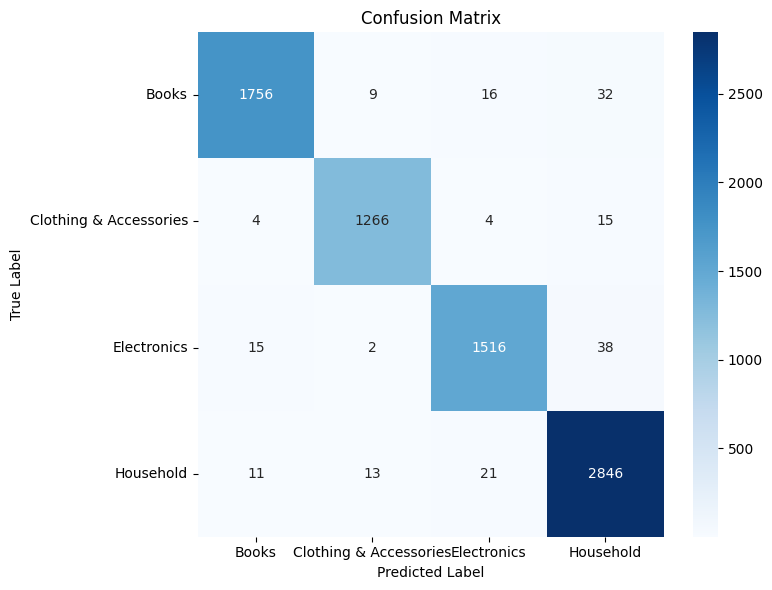

In [114]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()